In [10]:
import torch
import torch.nn as nn
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
data = pd.read_csv('moore.csv', header=None).values
# reshaping to (N, D)
X = data[:, 0].reshape(-1, 1)
Y = data[:, 1].reshape(-1, 1)

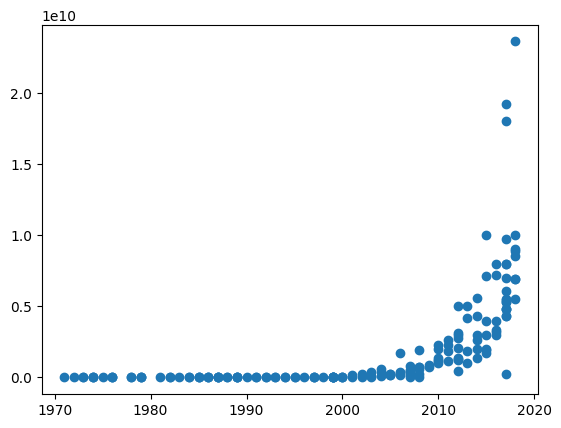

In [4]:
plt.scatter(X, Y)

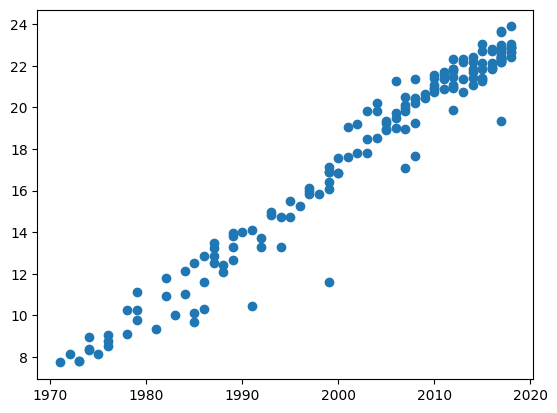

In [5]:
# taking log of Y values
Y = np.log(Y)
plt.scatter(X, Y);

In [6]:
# normalize
mx = X.mean()
sx = X.std()
my = Y.mean()
sy = Y.std()
X = (X - mx) / sx
Y = (Y - my) / sy

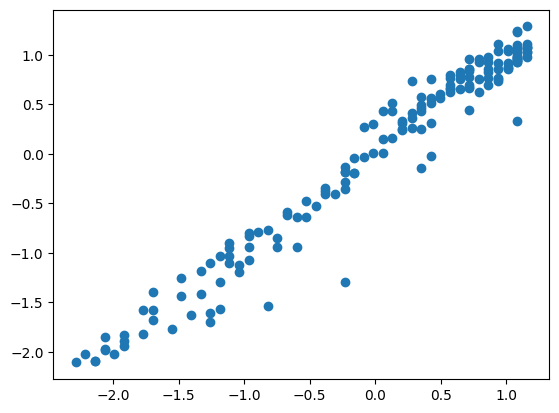

In [7]:
plt.scatter(X, Y)

In [8]:
X = X.astype(np.float32)
Y = Y.astype(np.float32)

In [11]:
model = nn.Linear(1, 1)

In [12]:
criterion = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.01, momentum=0.7)

In [13]:
inputs = torch.from_numpy(X)
targets = torch.from_numpy(Y)

In [14]:
type(inputs)

torch.Tensor

In [15]:
# training loop

n_epochs = 100
losses = []

for it in range(n_epochs):
  optimizer.zero_grad()

  # forward pass
  outputs = model(inputs)
  loss = criterion(outputs, targets)

  # backward pass
  loss.backward()
  optimizer.step()

  losses.append(loss.item())

  print(f'Epoch: {it+1}/{n_epochs}, Loss: {loss.item():.4f}')

Epoch: 1/100, Loss: 4.2426
Epoch: 2/100, Loss: 4.0761
Epoch: 3/100, Loss: 3.8040
Epoch: 4/100, Loss: 3.4738
Epoch: 5/100, Loss: 3.1201
Epoch: 6/100, Loss: 2.7668
Epoch: 7/100, Loss: 2.4290
Epoch: 8/100, Loss: 2.1157
Epoch: 9/100, Loss: 1.8315
Epoch: 10/100, Loss: 1.5778
Epoch: 11/100, Loss: 1.3542
Epoch: 12/100, Loss: 1.1590
Epoch: 13/100, Loss: 0.9899
Epoch: 14/100, Loss: 0.8444
Epoch: 15/100, Loss: 0.7198
Epoch: 16/100, Loss: 0.6134
Epoch: 17/100, Loss: 0.5230
Epoch: 18/100, Loss: 0.4463
Epoch: 19/100, Loss: 0.3815
Epoch: 20/100, Loss: 0.3267
Epoch: 21/100, Loss: 0.2805
Epoch: 22/100, Loss: 0.2416
Epoch: 23/100, Loss: 0.2089
Epoch: 24/100, Loss: 0.1814
Epoch: 25/100, Loss: 0.1583
Epoch: 26/100, Loss: 0.1389
Epoch: 27/100, Loss: 0.1226
Epoch: 28/100, Loss: 0.1089
Epoch: 29/100, Loss: 0.0975
Epoch: 30/100, Loss: 0.0879
Epoch: 31/100, Loss: 0.0799
Epoch: 32/100, Loss: 0.0731
Epoch: 33/100, Loss: 0.0675
Epoch: 34/100, Loss: 0.0628
Epoch: 35/100, Loss: 0.0588
Epoch: 36/100, Loss: 0.0555
E

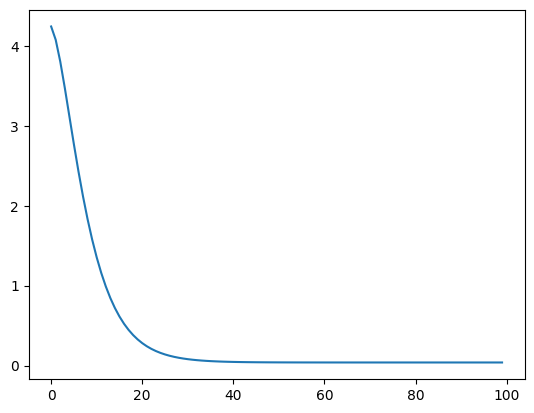

In [16]:
plt.plot(losses)

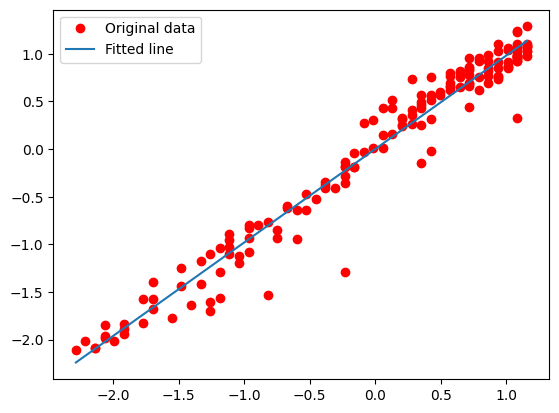

In [17]:
predictions = model(torch.from_numpy(X)).detach().numpy()
plt.plot(X, Y, 'ro', label='Original data')
plt.plot(X, predictions, label='Fitted line')
plt.legend()
plt.show()

In [18]:
w = model.weight.data.numpy()
b = model.bias.data.numpy()

w, b

(array([[0.98019713]], dtype=float32), array([0.00014433], dtype=float32))

## Transforming back to original scale

The original equation is $ C=C_0r^t $
After taking log,
$$ \log{C} = \log{C_0} + t \log{r} $$

Comparing with $$ y = ax + \log{C_0} $$
we get, $ y = \log{C},\: x = t, a = \log{r} $

We normalized the data as:
$$ y' = \frac{y-m_y}{s_y} $$
$$ x' = \frac{x-m_x}{s_x} $$

So, the equation turns out to be
$$ y' = wx' + b $$

$$ \frac{y-m_y}{s_y} = w \frac{x-m_x}
{s_x} + b $$

$$ y = w\frac{s_y}{s_x}x - w\frac{s_y}{s_x}m_x + bs_y + m_y = ax + \log{C_0} $$

Thus we get
$$ a = w\frac{s_y}{s_x} $$


In [19]:
a = w[0][0] * sy / sx
a

0.3415521691216442

Now,
$$ a = \log{r} $$

$$ r = e^{a} = 1.40728 $$

We are interesting in the time it takes to double the transistor count.

$$ 2C = C_0r^{t'} $$
$$ C = C_0r^t $$

Divinding the equations
$$ 2 = r^{t'-t} $$

$$ t'-t = \frac{\log{2}}{\log{r}} = \frac{\log{2}}{a} $$

We can note that this turns out to be independent of the starting time $t$.

In [20]:
print("Time to double: ", np.log(2) / a)

Time to double:  2.0294035383891242


Which reveals, it takes about 2 years for transistor count to double.